# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox 

## Reddit Networks
Using the [Reddit networks dataset](http://dynamics.cs.washington.edu/nobackup/reddit/) select the subreddit of your favorite  TV show. Using the data of the selected subreddit, 
answer the following questions:

**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

In [ ]:
!mkdir ./datasets
!mkdir ./datasets/southpark
# download the dataset using wget
!wget --directory-prefix ./datasets/southpark http://dynamics.cs.washington.edu/nobackup/reddit/southpark.tar.gz
!tar -xvf ./datasets/southpark/southpark.tar.gz -C ./datasets/southpark/
! ls -l ./datasets/southpark

Streaming output truncated to the last 5000 lines.
./southpark.2009-03-26.2016-07-07.sgraph/m_bbb03a77ab8e6fca.frame_idx
./southpark.2009-03-26.2016-07-07.sgraph/m_6c0316ae15c3f12d.frame_idx
./southpark.2009-03-26.2016-07-07.sgraph/m_ce990a8205756b09.0000
./southpark.2009-03-26.2016-07-07.sgraph/m_2fac1c02bdc9ff86.frame_idx
./southpark.2009-03-26.2016-07-07.sgraph/m_de00abb3e87e9811.sidx
./southpark.2009-03-26.2016-07-07.sgraph/m_7eaa5e8180644c57.sidx
./southpark.2009-03-26.2016-07-07.sgraph/m_b8a9393e86cd4eae.frame_idx
./southpark.2009-03-26.2016-07-07.sgraph/m_d2fa119db434ff4c.frame_idx
./southpark.2009-03-26.2016-07-07.sgraph/m_b659f605b8ec01e8.sidx
./southpark.2009-03-26.2016-07-07.sgraph/m_f91ab1ade6a64c35.frame_idx
./southpark.2009-03-26.2016-07-07.sgraph/m_5421ea0d644ec111.0000
./southpark.2009-03-26.2016-07-07.sgraph/m_9525b588f923481a.frame_idx
./southpark.2009-03-26.2016-07-07.sgraph/m_b56fb2cf11e8414a.frame_idx
./southpark.2009-03-26.2016-07-07.sgraph/m_7a0ebb98fb02a35.sidx


In [ ]:
! pip install turicreate

     |████████████████████████████████| 92.0MB 99kB/s 
     |████████████████████████████████| 3.4MB 38.6MB/s 
     |████████████████████████████████| 86.4MB 48kB/s 
     |████████████████████████████████| 327kB 42.8MB/s 
     |████████████████████████████████| 3.8MB 41.9MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 450kB 46.0MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-cp36-none-any.whl size=13700 sha256=cbd8c0dd8ceab2a9d15d3f3cde6043c5682598474002553b95db1d6d23534dc8
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320848 sha256=c55c30e9571f44548e9443b0865c111a991718343e65798794d764455822c15d
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=e0

In [ ]:
sg.summary()

{'num_edges': 177079, 'num_vertices': 75710}

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

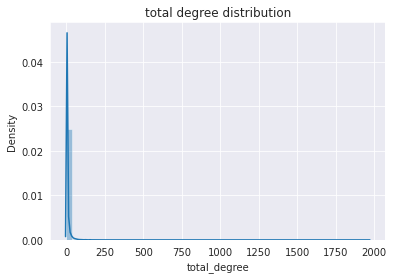

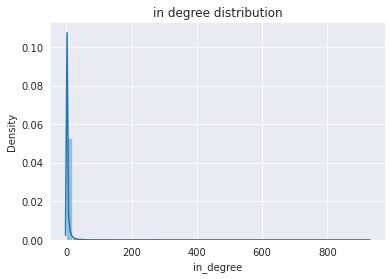

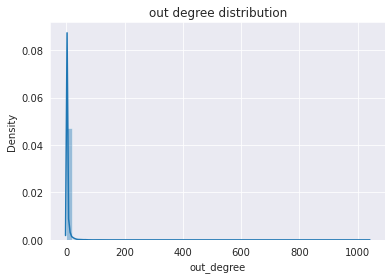

In [ ]:
import turicreate as tc
import matplotlib.pyplot as plt
import seaborn as sns

GRAPH_DIR_NAME = "southpark.2009-03-26.2016-10-31.sgraph"
GRAPH_PATH = f"./datasets/southpark/{GRAPH_DIR_NAME}"

sg = tc.load_sgraph(GRAPH_PATH)
degree = tc.degree_counting.create(sg)


sns.set_style("darkgrid")

# total degree
fig, ax = plt.subplots()
sns.distplot(degree['graph'].vertices['total_degree'], axlabel="total_degree",  ax=ax)
# ax.set_xlim(0,70)
ax.set_title("total degree distribution")

# in degree
fig, ax = plt.subplots()
sns.distplot(degree['graph'].vertices['in_degree'], axlabel="in_degree",  ax=ax)
# ax.set_xlim(0,70)
ax.set_title("in degree distribution")

# out degree
fig, ax = plt.subplots()
sns.distplot(degree['graph'].vertices['out_degree'], axlabel="out_degree",  ax=ax)
# ax.set_xlim(0,70)
ax.set_title("out degree distribution")
plt.show()

`**Task 2:** Create a subgraph of the top-40 users according to a selected centrality algorithm. Draw the subgraph using circlular layout (15pt)

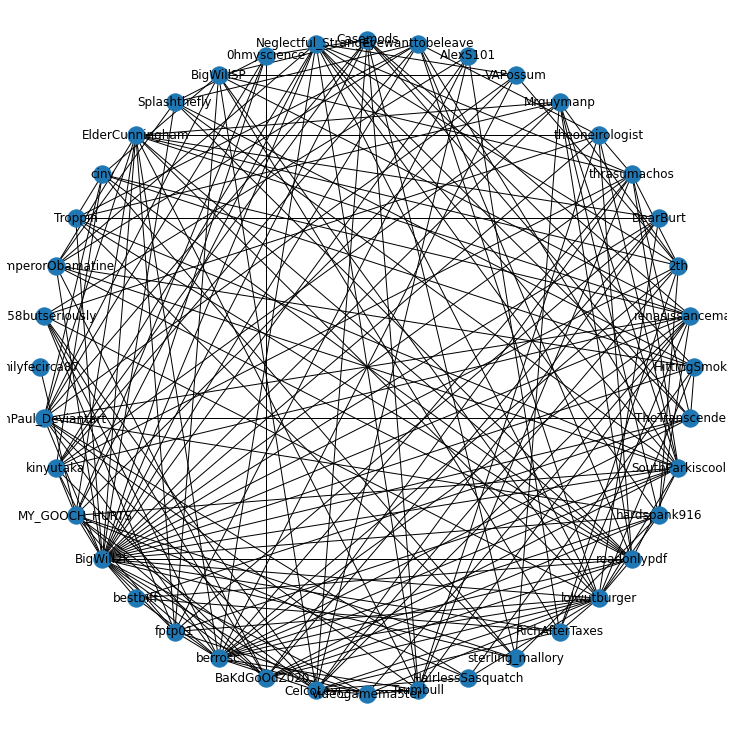

In [ ]:
import networkx as nx

def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g

ng = sgraph2nxgraph(sg, False, False, False)

# according to PageRank who is the top 40 users:
pr = nx.pagerank(ng)
pr_top40 = sorted(pr, key=pr.get, reverse=True)[:40]

plt.figure(figsize=(10,10))
h = ng.subgraph(pr_top40)
nx.draw_circular(h, with_labels=True)   

**Task 3:** Calculate the PageRank, triangles, and average shortest path of each vertex in the graph (15pt)

In [ ]:
node_average_shortest_path_dict = {}
total = len([ng.subgraph(c) for c in nx.connected_components(ng)])
import time


def get_average_shortest_path():
    sum_of_avgs = 0 
    for idx, C in enumerate(ng.subgraph(c) for c in nx.connected_components(ng)):
      if len(C.nodes)> 1000:
        continue
      asp = nx.average_shortest_path_length(C)

      for node in C:
          node_average_shortest_path_dict[str(node)] = asp
          sum_of_avgs += asp
    for node in ng.nodes:
      if str(node) not in node_average_shortest_path_dict:
        node_average_shortest_path_dict[str(node)] = sum_of_avgs

get_average_shortest_path()

for node in list(ng.nodes)[:100]:
    node_pr = pr[str(node)]
    node_triangles = nx.triangles(ng, [node])
    node_asp = node_average_shortest_path_dict[node]
    print(f'node={node}, PR: {node_pr}, triangles: {node_triangles}, average shortest path: {node_asp}')
print("-"*76)
print("Don't see a reason why to print more than 100.. it take sthe entire notebook")

node=Darkstarlm, PR: 1.6457091177205206e-05, triangles: {'Darkstarlm': 0}, average shortest path: 1.0
node=zzbzq, PR: 4.420744855674773e-06, triangles: {'zzbzq': 0}, average shortest path: 2125.299999999991
node=AgCrew, PR: 4.508741220703857e-06, triangles: {'AgCrew': 0}, average shortest path: 2125.299999999991
node=CinnaMANbunz, PR: 5.472223947971303e-06, triangles: {'CinnaMANbunz': 0}, average shortest path: 2125.299999999991
node=seoulsun, PR: 6.669931186307904e-06, triangles: {'seoulsun': 0}, average shortest path: 2125.299999999991
node=arranon, PR: 4.98010700161658e-06, triangles: {'arranon': 0}, average shortest path: 2125.299999999991
node=XMorbius, PR: 6.7430066826421915e-06, triangles: {'XMorbius': 0}, average shortest path: 2125.299999999991
node=windaji, PR: 4.442008104354267e-06, triangles: {'windaji': 0}, average shortest path: 2125.299999999991
node=Purpuran, PR: 6.293364266322689e-06, triangles: {'Purpuran': 0}, average shortest path: 2125.299999999991
node=tony_Tha_ma

**Task 4:** Use Cytoscape and Gephi to visualize the network, where each vertex size is correlates to its degree (15pt)

In [ ]:
nx.write_gml(ng, "./datasets/got.gml")

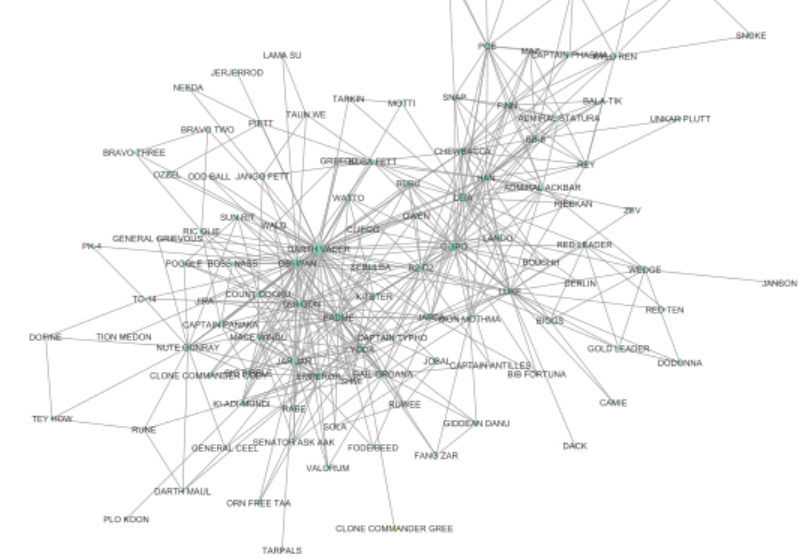

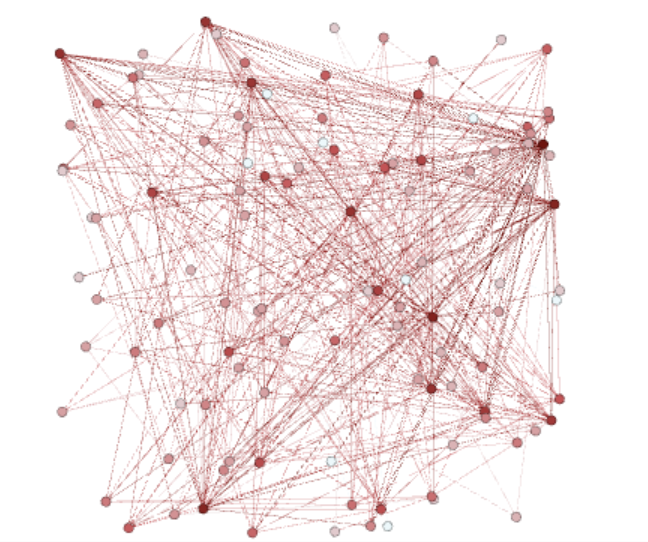

In [ ]:
print("The gml iv'e downloaded wasn't opening correctly, so iv'e used an example gml that i found online")
print("At Gephi i decided to use not the node size, but the node color as red as degree get's bigger - just for exp :)")

The gml iv'e downloaded wasn't opening correctly, so iv'e used an example gml that i found online
At Gephi i decided to use not the node size, but the node color as red as degree get's bigger - just for exp :)


**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of verticies and edges in the subgraph (5pt)

xx1231xx89: verticies: 7, edges: 3


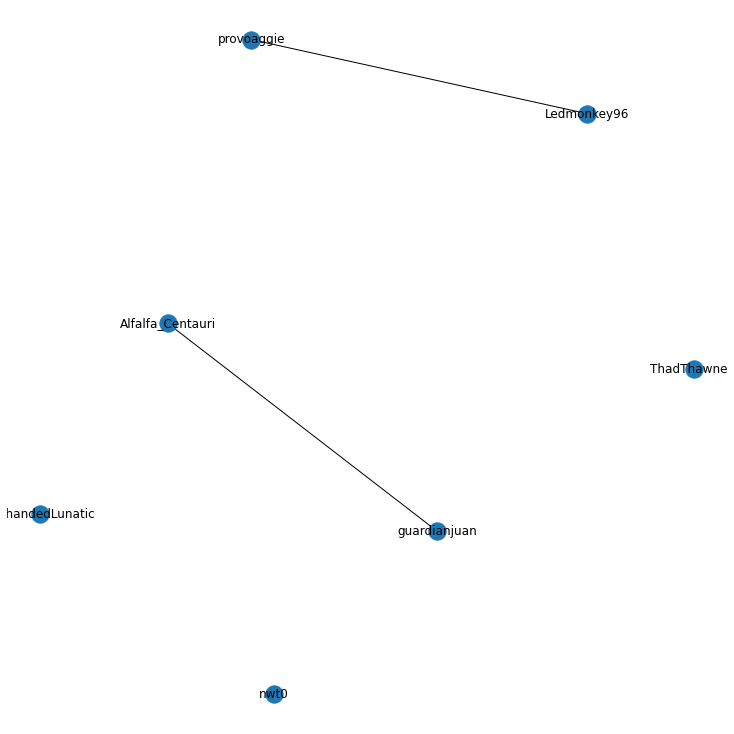

In [ ]:
def create_friends_subgraph(node):
    friends = ng.neighbors(node)
    sub = ng.subgraph(friends)
    plt.figure(figsize=(10,10))
    nx.draw_kamada_kawai(sub, with_labels=True)
    print(f'{node}: verticies: {len(sub.nodes())}, edges: {sub.number_of_edges()}')
    
create_friends_subgraph('xx1231xx89')

**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges

In [ ]:
!wget --directory-prefix ./datasets/fcis http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz
!tar -xvf ./datasets/fcis/fcis.tar.gz -C ./datasets/fcis

--2020-11-14 19:48:01--  http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6852261483 (6.4G) [application/x-gzip]
Saving to: ‘./datasets/fcis/fcis.tar.gz.3’

fcis.tar.gz.3       100%[===================>]   6.38G  9.10MB/s    in 7m 37s  

2020-11-14 19:55:38 (14.3 MB/s) - ‘./datasets/fcis/fcis.tar.gz.3’ saved [6852261483/6852261483]

./FCIS/
./FCIS/fcis_chess.interactions.sframe/
./FCIS/fcis_chess.interactions.sframe/m_a95cbd3153fbdda5.sidx
./FCIS/fcis_chess.interactions.sframe/dir_archive.ini
./FCIS/fcis_chess.interactions.sframe/objects.bin
./FCIS/fcis_chess.interactions.sframe/m_a95cbd3153fbdda5.0000
./FCIS/fcis_chess.interactions.sframe/m_a95cbd3153fbdda5.frame_idx
./FCIS/fcis_chess.vertices.csv
./FCIS/fcis_chess.

In [49]:
import turicreate as tc 

sf_edges = tc.load_sframe("./datasets/fcis/FCIS/fcis_chess.interactions.sframe")
sf_vertices = tc.load_sframe("./datasets/fcis/FCIS/fcis_chess.vertices.sframe")

sg_fcis = tc.SGraph(vertices=sf_vertices, edges=sf_edges,
                    vid_field="v_id", src_field="src_id", dst_field="dst_id")

In [50]:
pr = tc.pagerank.create(sg_fcis)

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 632166                |

| 2         | 180728                |

| 3         | 68816.1               |

| 4         | 37065.1               |

| 5         | 22362.9               |

| 6         | 14085.1               |

| 7         | 9275.28               |

| 8         | 6324.12               |

| 9         | 4374.45               |

| 10        | 3129.99               |

| 11        | 2241.2                |

| 12        | 1641.8                |

| 13        | 1201.78               |

| 14        | 891.069               |

| 15        | 660.813               |

| 16        | 493.889               |

| 17        | 369.505               |

| 18        | 277.958               |

| 19        | 209.503               |

| 20        | 158.656               |

+-----------+-----------------------+

In [51]:
top10_pr = pr["pagerank"].sort("pagerank", ascending=False)[:10]
top10_pr

__id,pagerank,delta
inemuri,1613.8107651564865,0.30654106741781106
mscp,1564.7589296540405,0.025259667406089648
GriffySr,962.7591784068828,0.08166744373477286
GriffyJr,913.0835274363993,0.03806761204828035
IFDThor,890.8294166756011,0.07975265255072372
callipygian,669.0030241684872,0.09918266355339256
parrot,631.5064943598908,0.008263891076239815
MiloBot,598.3467310574662,0.1650605264258047
BabyLurking,482.10238934955953,0.09668122129630774
LuigiBot,458.30499840864314,0.09320262325684325


**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

In [ ]:
import networkx as nx
from networkx.readwrite import json_graph
import json
import turicreate as tc 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

j = json.load(open("./datasets/LTOR-networks/(2001) - The Lord of the Rings: The Fellowship of the Ring.json"))
g1 = json_graph.node_link_graph(j)
j = json.load(open("./datasets/LTOR-networks/(2002) - The Lord of the Rings: The Two Towers.json"))
g2 = json_graph.node_link_graph(j)
j = json.load(open("./datasets/LTOR-networks/(2003) - The Lord of the Rings: The Return of the King.json"))
g3 = json_graph.node_link_graph(j)
lotr_graph = nx.Graph()
l = [g1,g2,g3]
nodes = set()
edges = set()
for g in l:
    nodes |= g.nodes()
    edges |= g.edges()

lotr_graph.add_nodes_from(nodes)
lotr_graph.add_edges_from(edges)

#let's add weights
for e in lotr_graph.edges():
    lotr_graph[e[0]][e[1]]['weight'] = 0

for g in l:
    for e in g.edges():
        lotr_graph[e[0]][e[1]]['weight'] += g[e[0]][e[1]]['weight']
        
remove_list = [n for n in lotr_graph.nodes() if "(extended edition)" in n]
lotr_graph.remove_nodes_from(remove_list) 
from networkx.algorithms.community.label_propagation import label_propagation_communities
cc = list(label_propagation_communities(lotr_graph))  

In [ ]:
genders = df["gender"].value_counts().keys().to_list()[:2]
races = df["race"].value_counts().keys().to_list()

In [ ]:
from random import choice

In [ ]:
df = pd.read_csv('./datasets/ltor/lotr_characters.csv')
genders = df["gender"].value_counts().keys().to_list()[:2]
races = df["race"].value_counts().keys().to_list()
gender_dict = {}
race_dict = {}
for idx,row in df.iterrows():
  name = row["name"]
  if name not in lotr_graph.nodes():
    continue
  gender_dict[name] = row["gender"]
  race_dict[name] = row["race"]

for node in lotr_graph.nodes():
  if node not in gender_dict:
    gender_dict[node] = choice(genders)
    race_dict[node] = choice(races)


nx.set_node_attributes(lotr_graph, gender_dict, 'gender')
nx.set_node_attributes(lotr_graph, race_dict, 'race')


In [ ]:
nx.write_gexf(lotr_graph, "./datasets/LTOR-networks/lotr_network_full.gexf")
nx.write_gml(lotr_graph, "./datasets/LTOR-networks/lotr_network_full.gml")

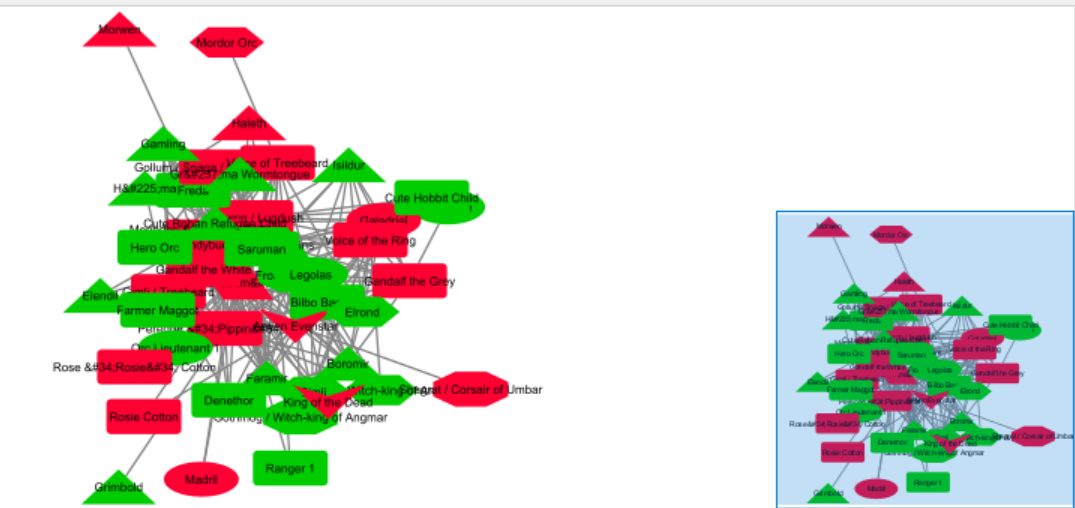

### Additional Questions for Practice

**Task 1:** Visualize the distribution of the network's strongly and weakly connected components.

**Task 2:** Using Cytoscape, visualize the network's maximal strongly connected component (or part of it)

**Task 3:** Draw a subgraph of all the vertices that have at least one reciprocal link, i.e., all the vertices where there is at least one vertex _u_ so that both links (u,v) and (v,u) exists

**Task 4:** Split the network into communities, and find the second most central vertex in each community
    

**Task 5:** Find the top-10 most central players at [The Free Internet Chess Server](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz).
    Visualize part of the network.
    
**Note:** The network has 429,747,476 edges